In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, welch
%matplotlib inline

# Loading signals

In [2]:
fs = 2000. #Hz

delsys_raw =  np.loadtxt("signals/delsys_signal.txt")
delsys = delsys_raw[:,1] - delsys_raw[:,1].mean()

dev5_raw = np.loadtxt("signals/dev5_signal.txt")[:,1]
dev5 = dev5_raw - dev5_raw.mean()

delsys_noise_raw =  np.loadtxt("signals/delsys_noise.txt")[:, 1]
delsys_noise = delsys_noise_raw - delsys_noise_raw.mean()

dev5_noise_raw = np.loadtxt("signals/dev5_noise.txt")[:, 1]
dev5_noise = dev5_noise_raw - dev5_noise_raw.mean()


# Signals on time domain (full)

In [3]:
def plot_on_time(delsys, dev5, text='', y_range=(-0.2, 0.2)):
    """Standard way of plotting on time domain."""
    
    y_range = y_range
    divisions = 11
    
    
    plt.figure(figsize=(20, 10))
    plt.rcParams['font.size'] = 22 
    
   
    t = np.linspace(0, delsys.shape[0]/fs, num=delsys.shape[0])
    x_range = (0., t[-1])
    spacing = np.linspace(*x_range, num=divisions)

    plt.subplot(211)
    plt.title("Delsys Bagnoli-2 %s"%text)
    plt.plot(t, delsys)
    plt.grid()
    plt.ylim(*y_range)
    plt.xlim(*x_range)
    plt.xticks(spacing)
    plt.ylabel("Amplitude(V)")
    plt.xlabel("Time(s)")

    
    t = np.linspace(0, dev5.shape[0]/fs, num=dev5.shape[0])
    x_range = (0., t[-1])
    spacing = np.linspace(*x_range, num=divisions)


    plt.subplot(212)
    plt.title("Dev5 %s"%text)
    plt.plot(t, dev5)
    plt.grid()
    plt.ylim(*y_range)
    plt.xlim(*x_range)
    plt.xticks(spacing)
    plt.ylabel("Amplitude(V)")
    plt.xlabel("Time(s)")

    plt.tight_layout(pad=1.0)
    plt.show()

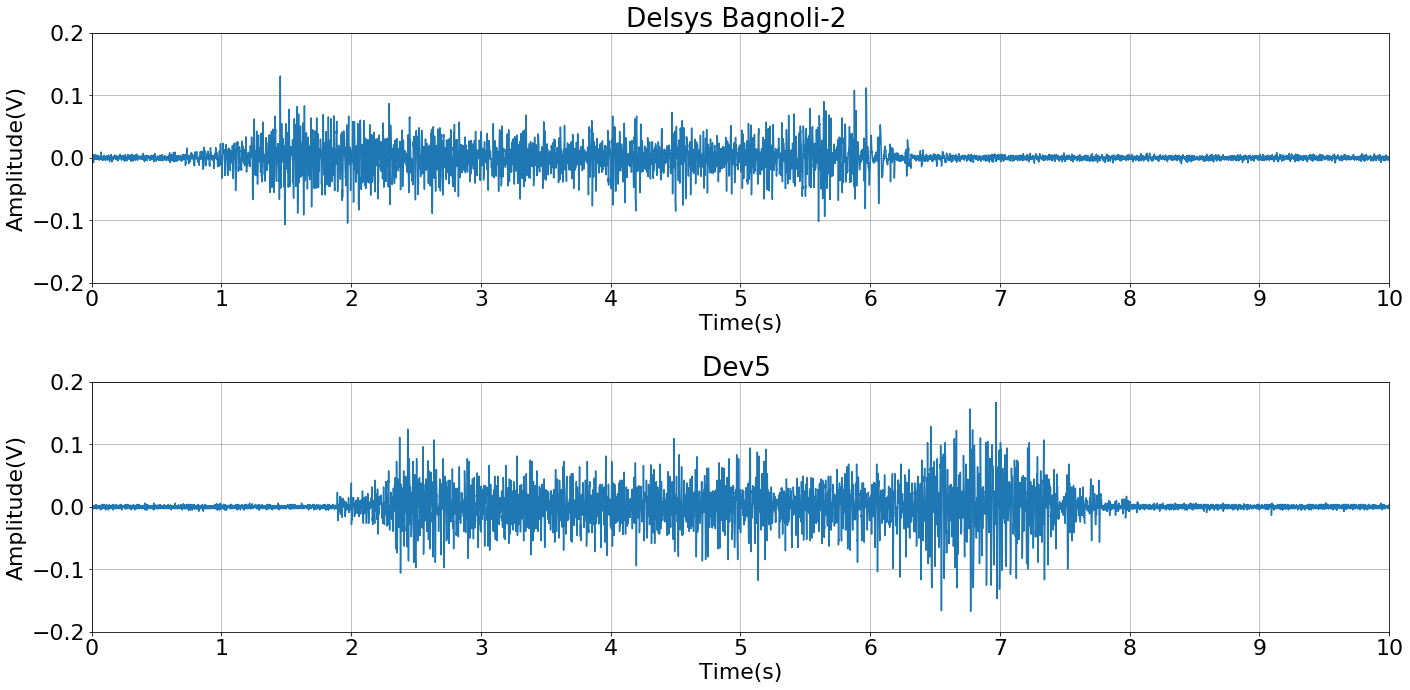

In [4]:
plot_on_time(delsys, dev5)

### Noise

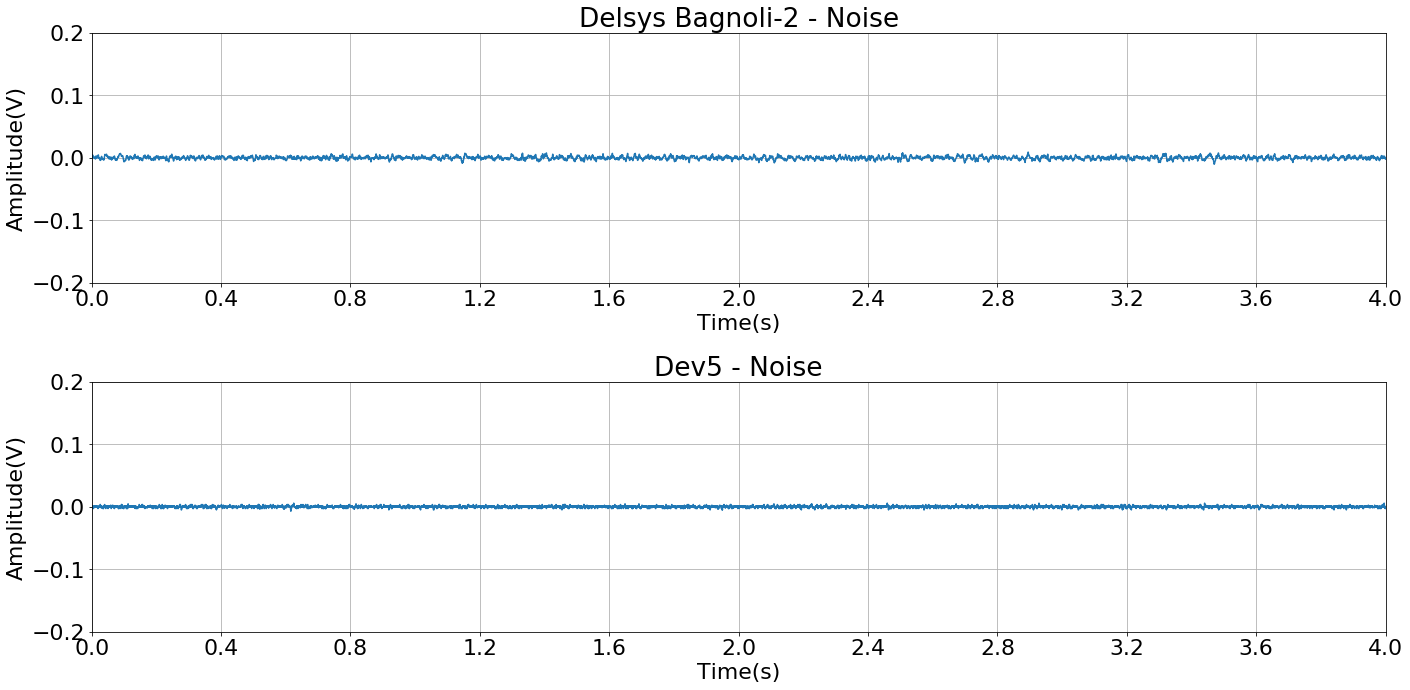

In [5]:
plot_on_time(delsys_noise, dev5_noise, text='- Noise')

## Cropping signal

 #### Signals are cropped so that only the contraction exists

In [6]:
time_to_crop_begin_delsys = 1.5
time_to_crop_end_delsys = 5.5


time_to_crop_begin_dev5 = 2.5
time_to_crop_end_dev5 = 6.5


delsys_cropped = delsys[
    int(time_to_crop_begin_delsys*fs):int(time_to_crop_end_delsys*fs)
]

dev5_cropped = dev5[
    int(time_to_crop_begin_dev5*fs):int(time_to_crop_end_dev5*fs)
]

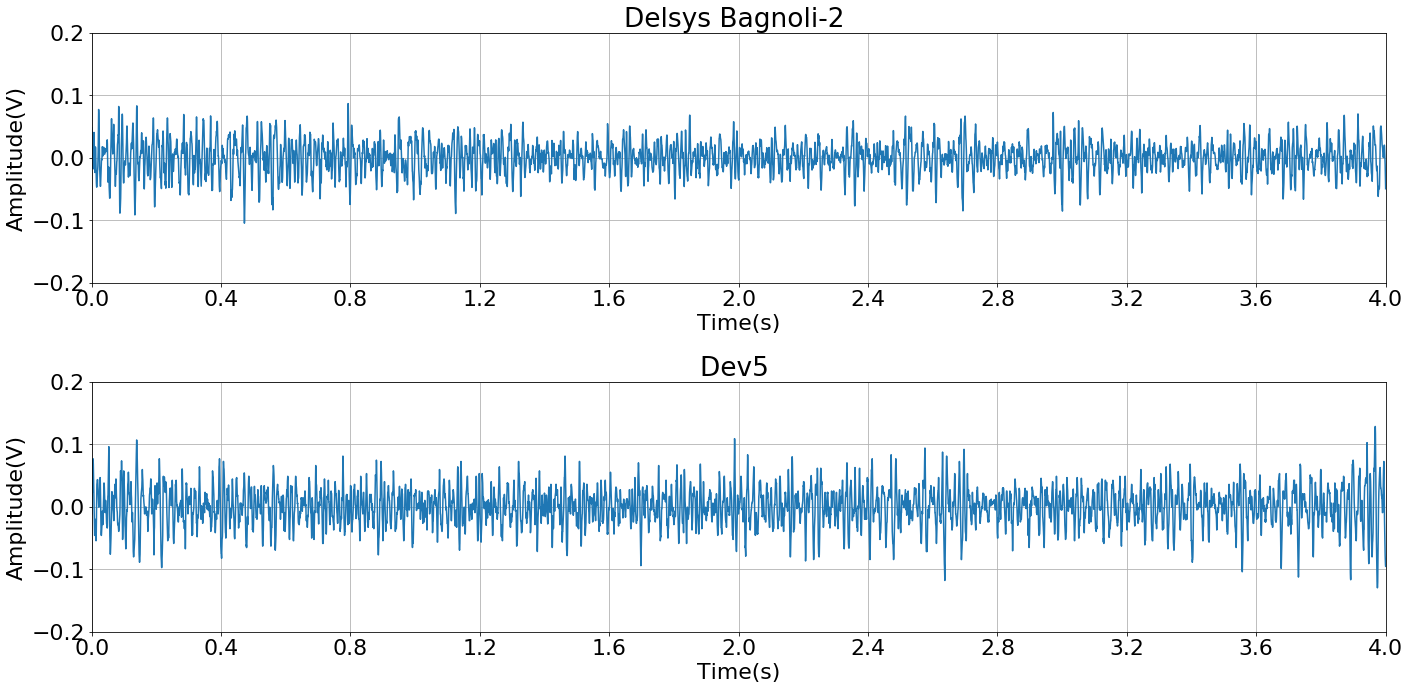

In [7]:
plot_on_time(delsys_cropped, dev5_cropped)

# Signals on frequency domain

In [8]:
def plot_on_frequency(delsys, dev5, text=''):
    """Standard way to plot the FFT."""
    
    t_window = 4. #seconds
    samples = int(fs * t_window)
    frequencies = np.fft.fftfreq(samples)
    F = np.abs(frequencies * fs)

    window = np.fft.fftshift(np.hanning(samples))

    delsys_spectrum =  np.abs(np.fft.fft(delsys)) * window
    dev5_spectrum = np.abs(np. fft.fft(dev5)) * window

    normalized_delsys_spectrum = delsys_spectrum/delsys_spectrum.max()
    normalized_dev5_spectrum = dev5_spectrum/dev5_spectrum.max()

    
    x_range = (0., 500.) # Hz
    y_range = (0.,1.) # %
    divisions = 11
    spacing = np.linspace(*x_range, num=divisions)

    plt.figure(figsize=(40, 10))
    plt.rcParams['font.size'] = 26 


    plt.subplot(121)
    plt.title("Spectrum Delsys Bagnoli-2 %s"%text)
    plt.plot(F, normalized_delsys_spectrum)
    plt.grid()
    plt.xlim(*x_range)
    plt.xticks(spacing)
    plt.ylim(*y_range)
    plt.ylabel("%Max")
    plt.xlabel("Frequency (Hz)")


    plt.subplot(122)
    plt.title("Spectrum Dev5 %s"%text)
    plt.plot(F, normalized_dev5_spectrum)
    plt.grid()
    plt.xlim(*x_range)
    plt.xticks(spacing)
    plt.ylim(*y_range)
    plt.ylabel("%Max")
    plt.xlabel("Frequency (Hz)")
    
    plt.tight_layout(pad=1.0)
    plt.show()

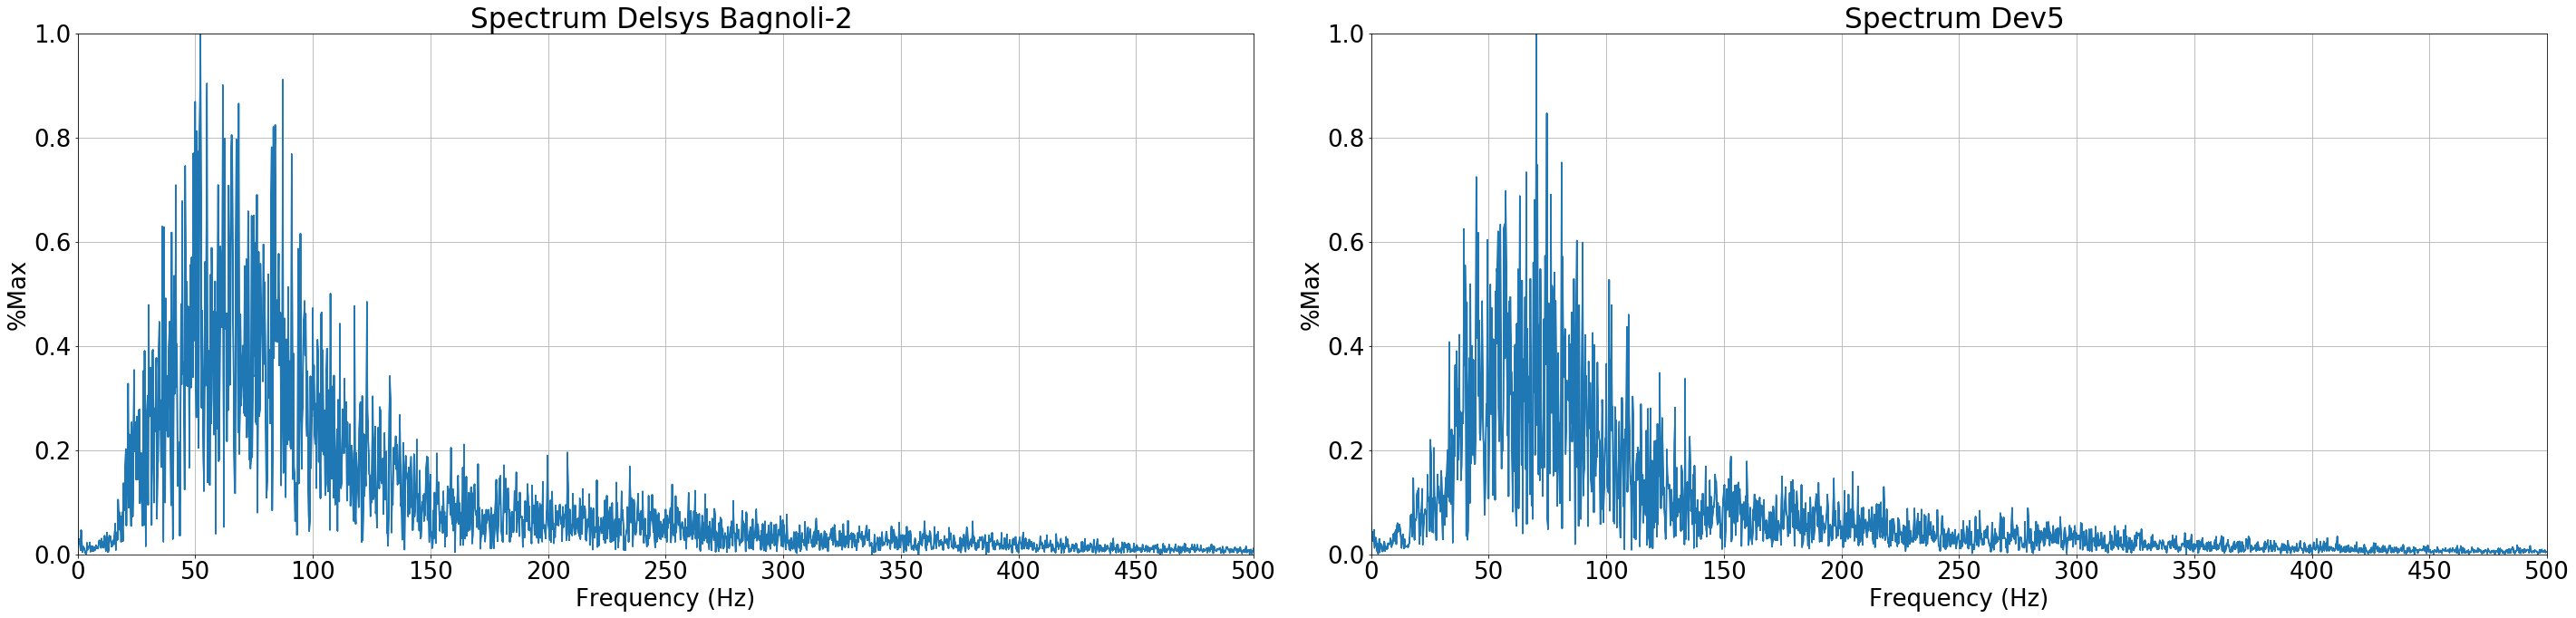

In [9]:
plot_on_frequency(delsys_cropped, dev5_cropped)

### Noise

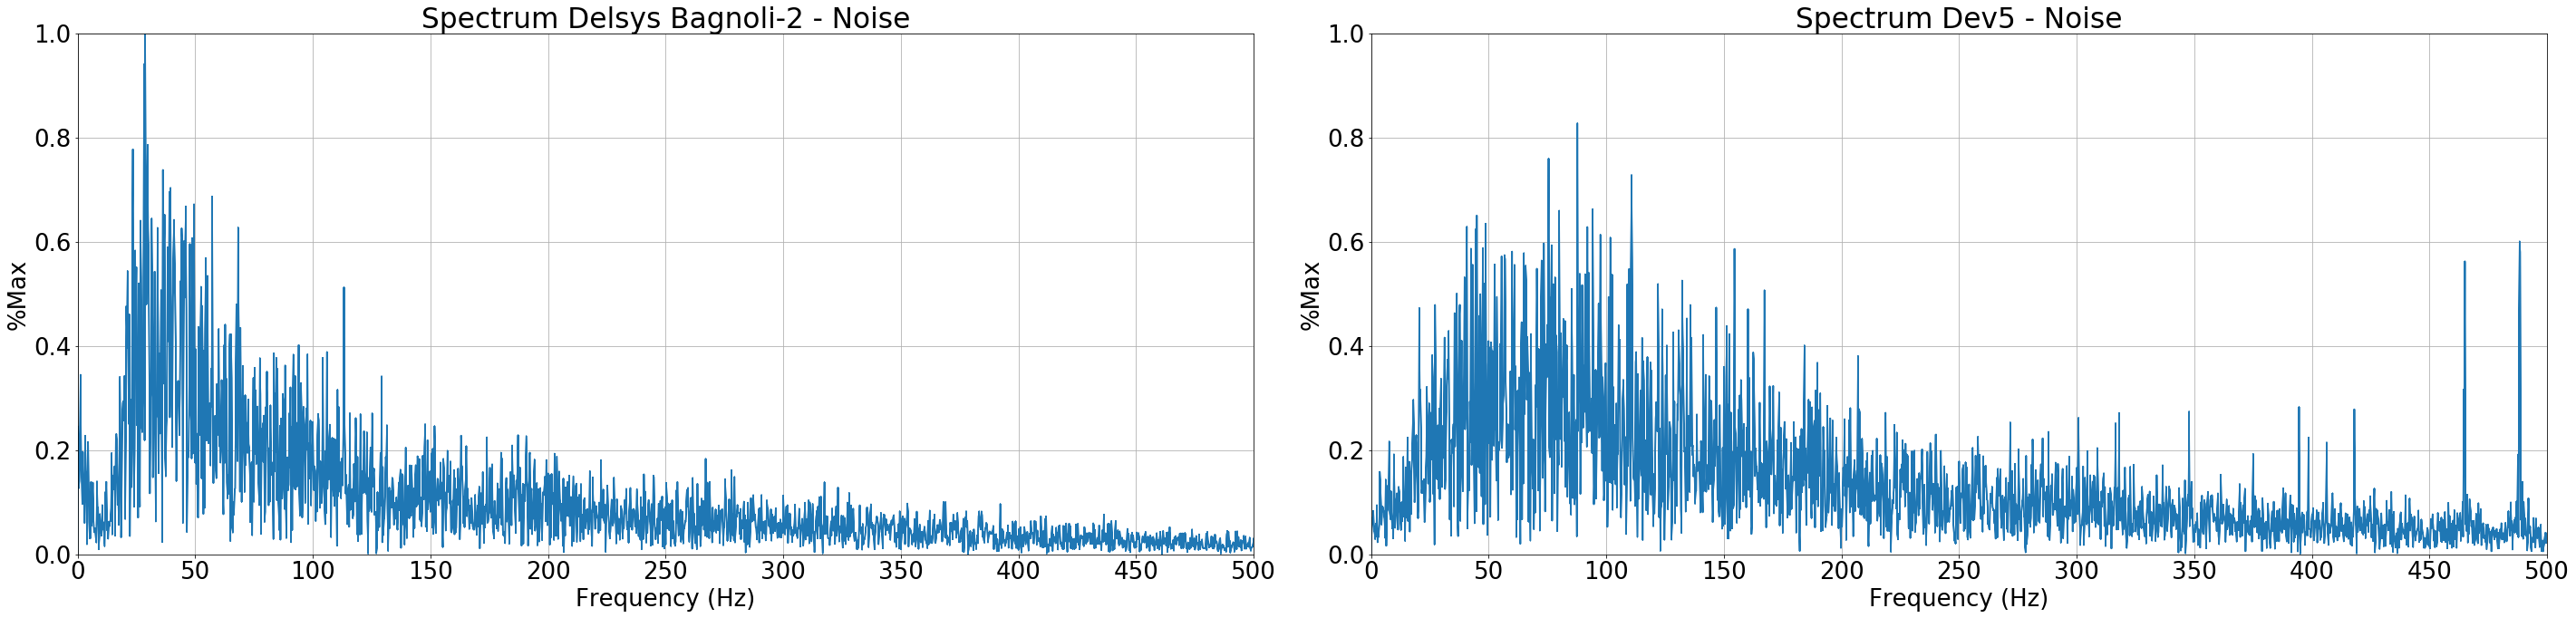

In [10]:
plot_on_frequency(delsys_noise, dev5_noise, '- Noise')

# SNR and RMS

$$
SNR = 20log_{10}\left(\frac{S_{RMS}}{N_{RMS}}\right)
$$


Where,
$S_{RMS}$ is the signal RMS value, and $N_{RMS}$ is the noise RMS value.



##### RMS (root mean square):

$$
x_{RMS} =  \sqrt{\frac{1}{N} \sum_{i=1}^{N}x_{i}^{2}   }
$$

In [11]:
def rms(x_array):
    """Calculates the RMS value for the whole series."""
    
    n = float(x_array.shape[0])
    return  np.sqrt((x_array**2).sum()/n)

snr = lambda  s, n: 20. * np.log10(s/n) 

In [12]:
delsys_rms = rms(delsys_cropped)
delsys_noise_rms = rms(delsys_noise)

dev5_rms = rms(dev5_cropped)
dev5_noise_rms = rms(dev5_noise)



print('RMS noise Delsys Bagnoli-2: %.2f mV(rms)'%(
    delsys_noise_rms*1000))
print('RMS noise dev5: %.2f mV(rms)'%(dev5_noise_rms*1000))

print('\n')

print('RMS signal Delsys Bagnoli-2: %.2f mV(rms)'%(delsys_rms*1000))
print('RMS signal dev5: %.2f mV(rms)'%(dev5_rms*1000))


print('\n')

print("SNR Delsys Bagnoli-2: %.2f dB" % snr(
    delsys_rms, delsys_noise_rms ))
print("SNR Dev5 SNR: %.2f dB" % snr(dev5_rms, dev5_noise_rms))

RMS noise Delsys Bagnoli-2: 2.48 mV(rms)
RMS noise dev5: 1.55 mV(rms)


RMS signal Delsys Bagnoli-2: 24.84 mV(rms)
RMS signal dev5: 30.24 mV(rms)


SNR Delsys Bagnoli-2: 20.01 dB
SNR Dev5 SNR: 25.81 dB


## Average Rectified Value (ARV) and linear envelope

In [13]:
delsys_rectified = np.abs(delsys_cropped)
dev5_rectified = np.abs(dev5_cropped)


print("Delsys' ARV: %.2f mV"%(delsys_rectified.mean() *1000))
print("Dev5's ARV: %.2f mV"%(dev5_rectified.mean() *1000))

Delsys' ARV: 19.29 mV
Dev5's ARV: 23.46 mV


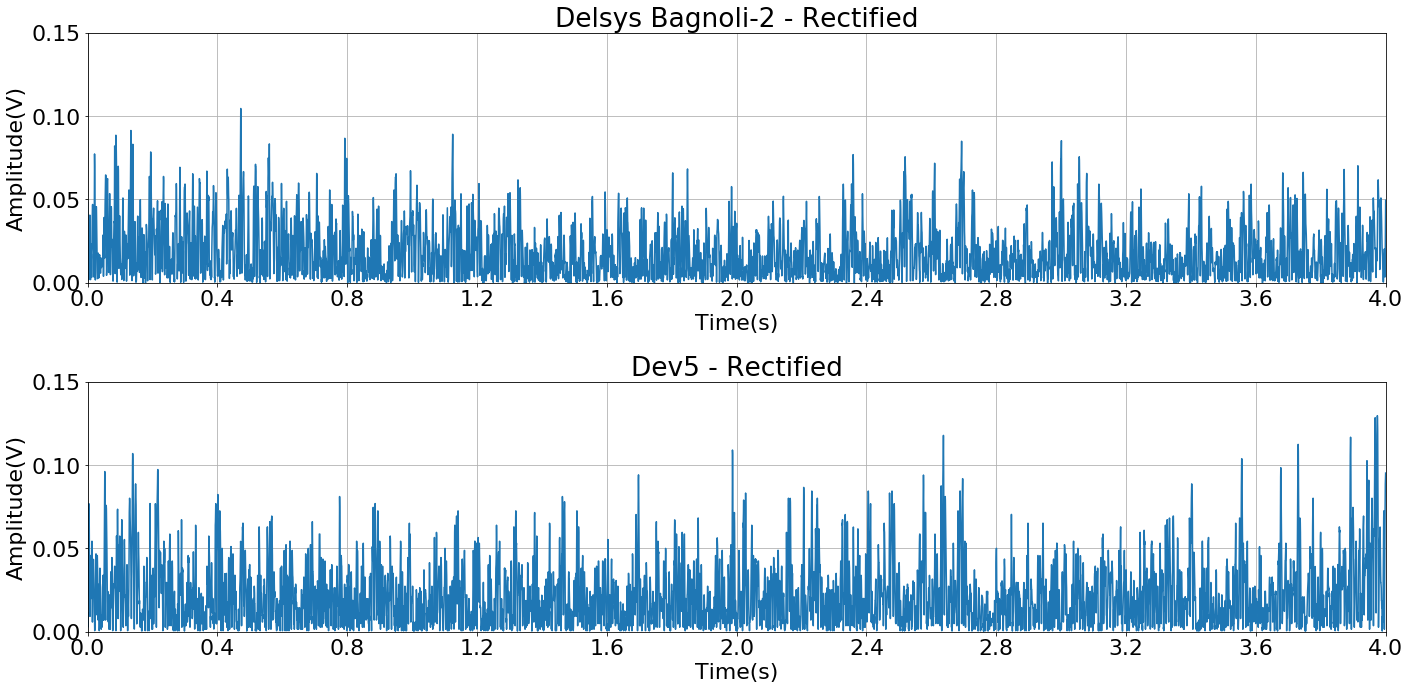

In [14]:
plot_on_time(delsys_rectified, dev5_rectified, 
             text='- Rectified', y_range=(0, 0.15))

In [15]:
def lowpass(signal, fc=20., order=4):
    b, a = butter(order, fc, btype='lowpass',fs=fs, analog=False)
    return lfilter(b,a, signal)

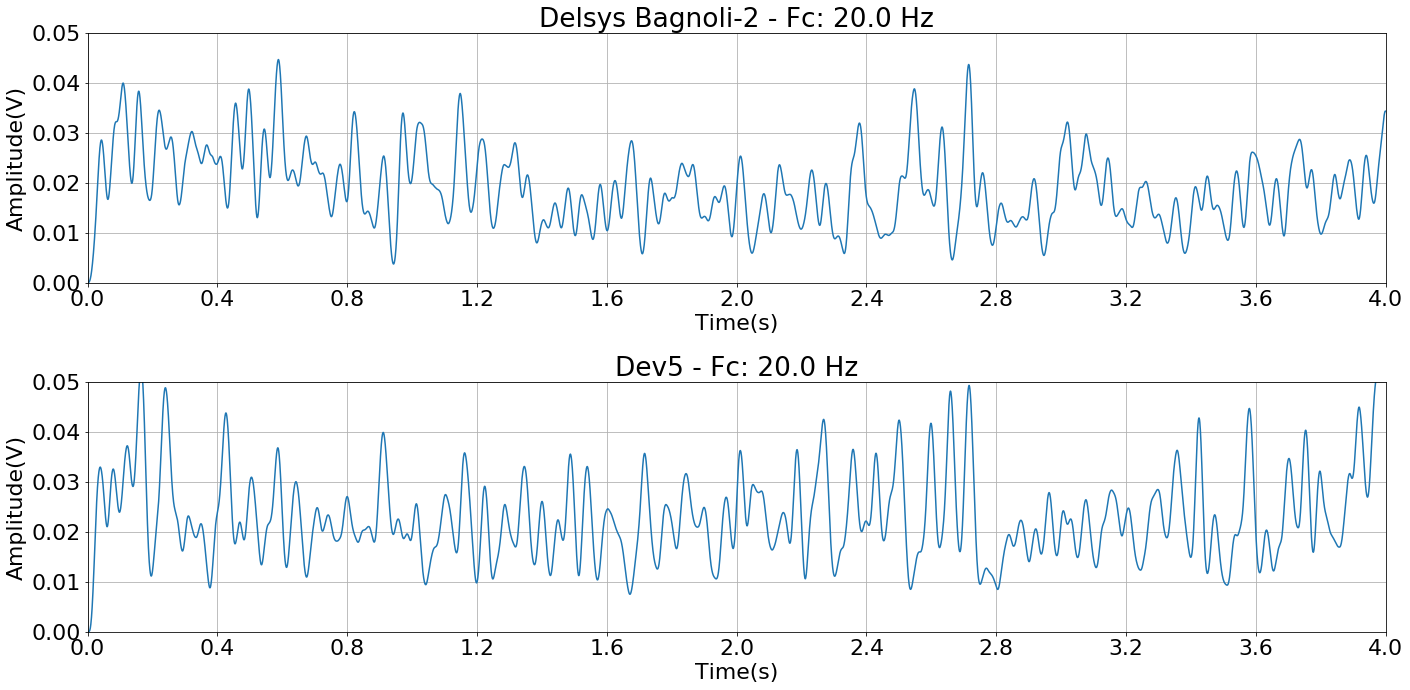

In [16]:
fc = 20.
delsys_lp = lowpass(delsys_rectified, fc)
dev5_lp = lowpass(dev5_rectified, fc)

plot_on_time(delsys_lp, dev5_lp, text='- Fc: %s Hz'%fc,  y_range=(0, 0.05))

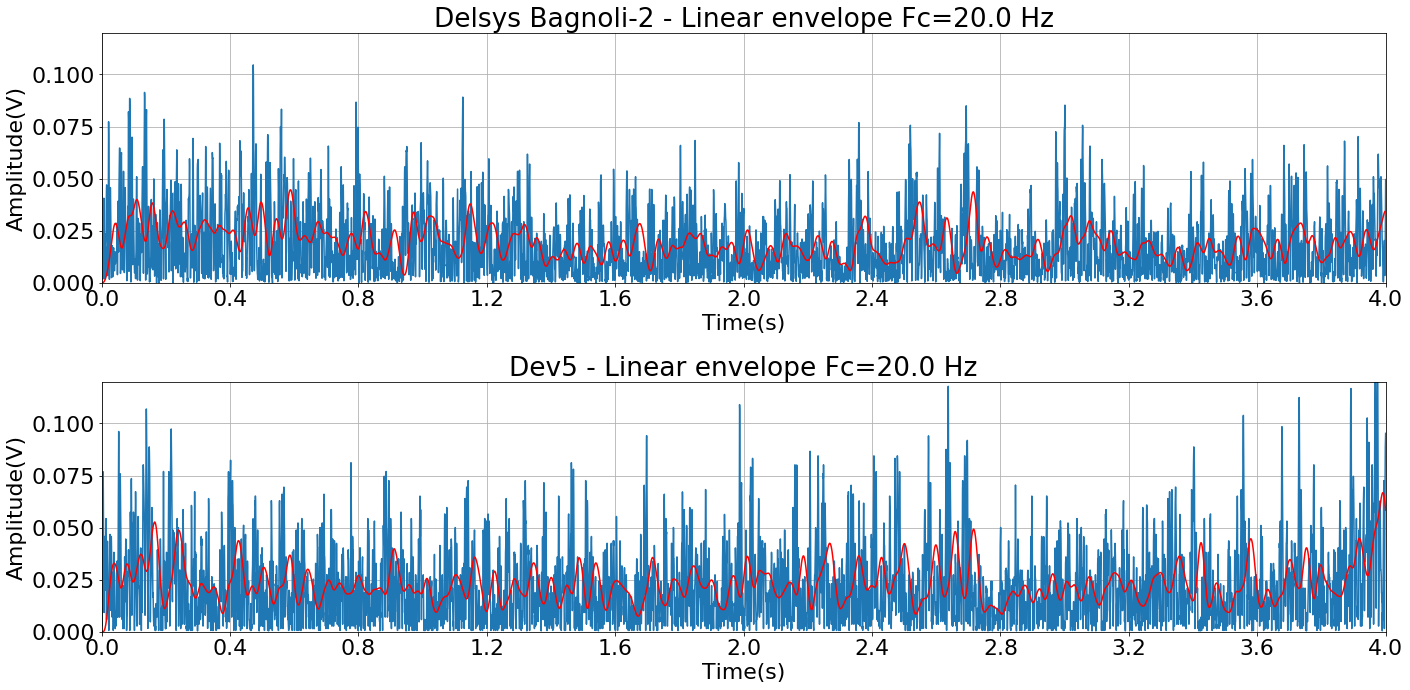

In [17]:
# Plotting the envelope and the rectified signal
    
y_range = (0,0.12)
divisions = 11
text='- Linear envelope Fc=%s Hz'%fc

plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 22 


t = np.linspace(0, delsys_rectified.shape[0]/fs, num=delsys_rectified.shape[0])
x_range = (0., t[-1])
spacing = np.linspace(*x_range, num=divisions)

plt.subplot(211)
plt.title("Delsys Bagnoli-2 %s"%text)
plt.plot(t, delsys_rectified)
plt.plot(t, delsys_lp, c='r')
plt.grid()
plt.ylim(*y_range)
plt.xlim(*x_range)
plt.xticks(spacing)
plt.ylabel("Amplitude(V)")
plt.xlabel("Time(s)")


t = np.linspace(0, dev5_rectified.shape[0]/fs, 
                num=dev5_rectified.shape[0])
x_range = (0., t[-1])
spacing = np.linspace(*x_range, num=divisions)


plt.subplot(212)
plt.title("Dev5 %s"%text)
plt.plot(t, dev5_rectified)
plt.plot(t, dev5_lp, c='r')
plt.grid()
plt.ylim(*y_range)
plt.xlim(*x_range)
plt.xticks(spacing)
plt.ylabel("Amplitude(V)")
plt.xlabel("Time(s)")

plt.tight_layout(pad=1.0)
plt.show()

#### Area below the curve  via Riemann sum
$$
\sum^n_{i=1} f(x_i) \Delta x
$$


In [18]:
delta_t = 1./fs

print("Delsys' area %.2f mV.s"%((delta_t*delsys_lp*1000).sum()))
print("Dev5's area %.2f mV.s"%((delta_t*dev5_lp*1000).sum()))

Delsys' area 76.63 mV.s
Dev5's area 92.95 mV.s


# Mean (MNF) and median (MDF) frequencies

### Mean frequency (MNF):
$$
MNF = \frac{ \sum^M_{j=1} f_j P_j}{\sum^M_{j=1} P_j}
$$

### Median frequency (MDF) :
$$
\sum^{MDF}_{j=1} P_j = \sum^M_{j=MDF} P_j = \frac{1}{2} \sum^M_{j=MDF} P_j
$$

In [19]:
f_delsys, delsys_power_spectrum = welch(delsys_cropped, fs)
f_dev5, dev5_power_spectrum = welch(dev5_cropped, fs)


# Mean frequencies
delsys_mean_frequency = (delsys_power_spectrum*f_delsys
                        ).sum()/delsys_power_spectrum.sum()
dev5_mean_frequency = (dev5_power_spectrum*f_dev5
                     ).sum()/dev5_power_spectrum.sum()

In [20]:
print("Delsys' MNF  %.2f Hz"%delsys_mean_frequency)
print("Dev5's MNF %.2f Hz"%dev5_mean_frequency)

Delsys' MNF  82.06 Hz
Dev5's MNF 84.04 Hz


In [21]:
def estimate_mdf(power_spectrum, frequencies):
    """Estimates the MDF."""
    
    half_power = power_spectrum.sum()/2.
    
    summed_power = 0
    for i, value in enumerate(power_spectrum):
        
        summed_power += value
        if summed_power >= half_power:
            break
            
    return frequencies[i]

In [22]:
# Median frequencies
delsys_median_frequency = estimate_mdf(delsys_power_spectrum, f_delsys)
dev5_median_frequency = estimate_mdf(dev5_power_spectrum, f_dev5)

In [23]:
print("Delsys' MDF %.2f Hz"%delsys_median_frequency)
print("Dev5's MDF %.2f Hz"%dev5_median_frequency)

Delsys' MDF 70.31 Hz
Dev5's MDF 70.31 Hz
